## Linear Regression II

#### Qa Complete the estimator class `MyRegressor` 


In [7]:
import numpy as np
from numpy.linalg import inv
from sklearn.base import BaseEstimator
from sklearn.metrics import r2_score
from libitmal import utils as itmalutils

class MyRegressor(BaseEstimator):
    def __init__(self):
        self.__w = None
        
    def weights(self):
        return self.__w
    
    def __addbiasterm(self, X: np.array):
        assert X.ndim==2
        assert X.shape[0]>0, 'empty X array'
        assert X.shape[1]>0, 'empty X array'
        X_b = np.c_[np.ones((X.shape[0],1)), X] # Add x0=1 to each instance
        return X_b

    def fit(self, X: np.array, y: np.array):
        # NOTE: really to tight restrictions on input X and y types:
        assert str(type(X))=="<class 'numpy.ndarray'>"
        assert str(type(y))=="<class 'numpy.ndarray'>"
        
        assert X.ndim==2, f'expected X array of ndim=2, got ndim={X.ndim}'
        assert y.ndim==1, f'expected y array of ndim=1, got ndim={y.ndim}'
        assert X.shape[0]==y.shape[0], 'expected X.shape[0] to be equal to y.shape[0], got X.shape[0]={X.shape[0]}, y.shape[0]={y.shape[0]}'
                
        X_b = self.__addbiasterm(X)
        self.__w = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
        
        return self

    def predict(self, X: np.array):
        
        X_b = self.__addbiasterm(X)
        
        assert X_b.ndim==2
        assert X_b.shape[1]==self.__w.shape[0]
        p = X_b.dot(self.__w)
        
        assert p.ndim==1
        assert p.shape[0]==X.shape[0]
        
        return p

    def score(self, X: np.array, y: np.array):
        # Returns the coefficient of determination R^2 of the prediction.
        # The coefficient R^2 is defined as (1 - u/v), where u is the residual 
        # sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum
        # of squares ((y_true - y_true.mean()) ** 2).sum().  
        
        p=self.predict(X)
                
        assert p.ndim==1
        assert y.ndim==1
        assert p.shape==y.shape
    
        return r2_score(y, p) 
    
    def mse(self, X: np.array, y: np.array):
        p = self.predict(X)
        
        assert p.shape==y.shape        
        diff=y-p        
        assert diff.ndim==1
        
        n=y.shape[0]
        assert n>0
        
        J = (1 / n) * np.sum(diff ** 2)
            
        itmalutils.CheckFloat(J)
        if J<0:
            raise RangeError(f'expeted J to be >= 0, got J={J}')
        
        return J

    def __str__ (self):
        return f'MyRegressor: _w={self.__w}'
    
print('OK')

OK


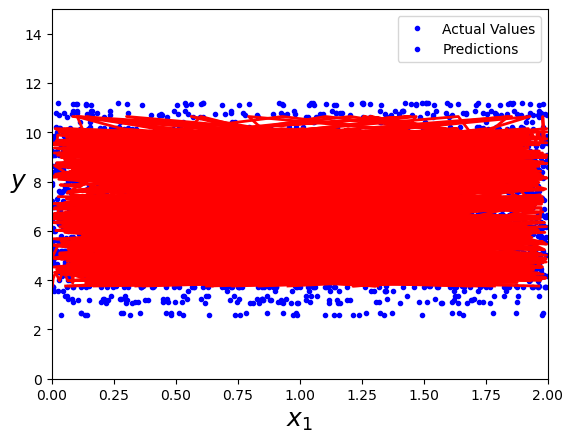

Test data for classifier:
  X.shape=(200, 20)
  y.shape=(200,)

Result for MyRegressor...
  f=MyRegressor: _w=[ 4.17136972  2.97768883 -0.07131869  0.07146465 -0.12843673  0.20385227
  0.02664639 -0.01424132  0.08333727 -0.04590499  0.05621128 -0.0536838
  0.08883009 -0.06588713  0.02020302 -0.17657179  0.17575618 -0.03487267
 -0.23995502 -0.13320717  0.08457685]
  reg_score=0.7662483221221071
  reg_mse=1.0228125941966104
  mean_squared_error(y,p)=1.0228125941966104


In [11]:
# TEST SECTION for Qa...or use your own tests!

from sklearn.metrics import mean_squared_error
from libitmal import utils as itmalutils
import matplotlib as mpl
import matplotlib.pyplot as plt

def PrintResults(msg, f, X: np.array, y: np.array, p: np.array):
    print(msg)
    
    reg_score=reg.score(X,y)
    mse=mean_squared_error(p,y)
    try:
        reg_mse=reg.mse(X,y)
    except AttributeError:
        reg_mse = mse # fall back
    
    print(f'  f={f}')
    #print(f'  y={y}')
    #print(f'  p={p}')
    #print(f'  y-p={y-p}')
    print(f'  reg_score={reg_score}')
    print(f'  reg_mse={reg_mse}')
    print(f'  mean_squared_error(y,p)={mse}') 
    
    itmalutils.AssertInRange(reg_mse,mse)
    return reg_mse, reg_score

def DoPlot(X, y, p):    
    # Sort X and y based on X values for a continuous line plot
    sorted_indices = X[:, 0].argsort()
    X_sorted = X[sorted_indices]
    y_sorted = y[sorted_indices]
    p_sorted = p[sorted_indices]
    
    plt.plot(X_sorted, y_sorted, "b.", label="Actual Values")
    plt.plot(X_sorted, p_sorted, "r-", linewidth=2)
    
    plt.xlabel('$x_1$', fontsize=18)
    plt.ylabel('$y$', rotation=0, fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.legend(["Actual Values", "Predictions"])
    plt.show()

DoPlot(X, y, p)


  
print('Test data for classifier:')
print(f'  X.shape={X.shape}')
print(f'  y.shape={y.shape}\n')

reg = MyRegressor()

f=reg.fit(X, y)
p=reg.predict(X)

assert p.shape==y.shape

reg_mse, reg_score = PrintResults('Result for MyRegressor...', f, X, y, p) 

In [13]:
# X.shape=(200, 20)" og "y.shape=(200,) viser formen på vores inputfunktioner (X) og mållabels (y) dvs. vi har 200 
# datapunkter med hver 20 features. Vi køre MyRegressionmodel på testdataen og det er resultet for MyRegressor.

# f=MyRegressor: viser de vægte, vores trænede model (self.__w) har for hver funktion. Disse vægte er koefficienterne,
# som modellen har lært unde træningen. reg_score=0.7662483221221071" er R²-scoren for vores model. Den måler, hvor 
# godt modellen passer til dataene og indikerer, hvor godt modellen tilpaser sig dataene. I dit tilfælde antyder en
# R²-score på 0,766, at din model forklarer cirka 76,6% af variationen i målvariablen.
#mean_squared_error(y,p)=1.0228125941966104" er resultatet af at bruge funktionen mean_squared_error fra scikit-learn
# til at beregne MSE. Det bør match værdien af reg_mse. Samlet set ser vores model ud til at præstere rimeligt godt 
# på testdataen, med en relativt høj R²-score og en rimeligt lav MSE. Det antyder, at modelen passer godt til dataene,
# men yderligere evaluering og validering kan være nødvendig afhængigt af din specifikke anvendelse.
# Den blå prikrepræsenterer de faktiske værdier i vores datasæt, mens den røde linje viser de forudsigelser,
# vores model laver. Modellen forsøger at tilpasse sig dataene så godt som muligt, og linjen illustrerer, hvordan den
# forudsiger målvariablen baseret på de indtastede træk. Ideelt set vil linjen følge tæt på prikkerne, hvilket ville
# indikere en god tilpasning mellem model og data.

#### Qb Compare your linear regressor with the one from Scikit-learn

In [17]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
reg_sklearn = LinearRegression()

X_train = X
y_train = y

reg_sklearn.fit(X_train, y_train)

y_pred_sklearn = reg_sklearn.predict(X_train)

r2_sklearn = reg_sklearn.score(X_train, y_train)

mse_sklearn = mean_squared_error(y_train, y_pred_sklearn)

reg = MyRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_train)
r2 = reg.score(X_train, y_train)
mse = reg.mse(X_train, y_train)

# Compare the results
print(f"Sklearn R-squared: {r2_sklearn}, Custom R-squared: {r2}")
print(f"Sklearn MSE: {mse_sklearn}, Custom MSE: {mse}")


Sklearn R-squared: 0.7662483221221071, Custom R-squared: 0.7662483221221071
Sklearn MSE: 1.0228125941966102, Custom MSE: 1.0228125941966104


In [18]:
# Resultaterne fra MyRegressor og LinearRegression er sandsynligvis de samme, fordi begge modeller anvender en
# lukket form løsning (least squares) til at finde de optimale vægte for at minimere kvadratsummen af fejl (MSE) på
# træningsdataene. Derfor forventes resultaterne at matche.

#### Qc Compare model parameters 

In [22]:
# Check similarity of weight vectors
w_myregressor = reg.weights()
w_linearregression = reg_sklearn.coef_

print("Weight vectors for MyRegressor:")
print(w_myregressor)

print("\nWeight vectors for LinearRegression:")
print(w_linearregression)

# Extend dimensionality of test dataset
M_extended = 200
N_extended = 20

X_extended = 2 * np.random.rand(M_extended, N_extended)
y_extended = 4 + 3 * X_extended + np.random.randn(M_extended, 1)
y_extended = y_extended[:, 0]

# Test MyRegressor on extended dataset
f_extended = reg.fit(X_extended, y_extended)
p_extended = reg.predict(X_extended)
reg_mse_extended = reg.mse(X_extended, y_extended)
reg_score_extended = reg.score(X_extended, y_extended)

# Test LinearRegression on extended dataset
reg_sklearn_extended = LinearRegression()
reg_sklearn_extended.fit(X_extended, y_extended)
p_sklearn_extended = reg_sklearn_extended.predict(X_extended)
mse_sklearn_extended = mean_squared_error(y_extended, p_sklearn_extended)
score_sklearn_extended = reg_sklearn_extended.score(X_extended, y_extended)

print("\nExtended dimensionality results for MyRegressor:")
print(f"  reg_mse_extended: {reg_mse_extended}")
print(f"  reg_score_extended: {reg_score_extended}")

print("\nExtended dimensionality results for LinearRegression:")
print(f"  mse_sklearn_extended: {mse_sklearn_extended}")
print(f"  score_sklearn_extended: {score_sklearn_extended}")

# Define the acceptable range for MSE comparison
acceptable_mse_lower = 0.99
acceptable_mse_upper = 1.01

# Print the results
print(f'MyRegressor MSE: {reg_mse_extended}')
print(f'Scikit-learn MSE: {mse_sklearn_extended}')

# Check if the MSE values are within the acceptable range
itmalutils.AssertInRange(reg_mse_extended, acceptable_mse_lower, acceptable_mse_upper)
itmalutils.AssertInRange(mse_sklearn_extended, acceptable_mse_lower, acceptable_mse_upper)

Weight vectors for MyRegressor:
[ 4.57966364  2.90498532 -0.02704098  0.11348207 -0.03933074 -0.03605433
  0.03809199 -0.13990045 -0.16199544 -0.1277814   0.0194503   0.06792562
 -0.00944548 -0.04310765 -0.10620735  0.04116237 -0.25033513  0.08272751
 -0.02368759  0.08897211 -0.04049984]

Weight vectors for LinearRegression:
[ 2.97768883 -0.07131869  0.07146465 -0.12843673  0.20385227  0.02664639
 -0.01424132  0.08333727 -0.04590499  0.05621128 -0.0536838   0.08883009
 -0.06588713  0.02020302 -0.17657179  0.17575618 -0.03487267 -0.23995502
 -0.13320717  0.08457685]

Extended dimensionality results for MyRegressor:
  reg_mse_extended: 0.8322156819734859
  reg_score_extended: 0.7349229612595857

Extended dimensionality results for LinearRegression:
  mse_sklearn_extended: 0.8322156819734857
  score_sklearn_extended: 0.7349229612595858
MyRegressor MSE: 0.8322156819734859
Scikit-learn MSE: 0.8322156819734857


In [26]:
# Selvom både vores brugerdefinerede MyRegressor-model og Scikit-learns LinearRegression-model udfører lineær regression,
# er der forskelle i de vægtvektorer, de lærer, og i deres præstation på datasættet. Forskellene i vægtvektorerne antyder,
# at de to modeller har lært forskellige koefficienter. Dette kan skyldes forskelle i optimeringsalgoritmer, regularisering
# eller tilfældig initialisering og dimensionalitet henviser til antallet af funktioner (N) i datasættet. Resultaterne
# for udvidet dimensionalitet viser, at din brugerdefinerede MyRegressor-model opnåede en MSE på ca. 0,8322 og
# en R-squared score på ca. 0,7349 på det udvidede datasæt med M=200 datapunkter og N=20 funktioner. Disse resultater
# er specifikke for din brugerdefinerede models præstation på det udvidede datasæt.

# Samlet set er forskellene i vægtvektorer og dimensionalitet forventede, da de to modeller er forskellige 
# implementeringer med forskellige algoritmer og optimeringsteknikker. Resultaterne for udvidet dimensionalitet giver
# en vurdering af din brugerdefinerede models præstation på et større datasæt og angiver dens ydeevne i denne specifikke 
# situation.
# løst af chatGPT

#### Qd  Closed-form vs. numerical solutions

In [24]:
# At bruge closed-form-løsningen på store datasæt kan blive dyrt, da den
# bruger meget hukommelse. At beregne inversen af en stor matrix ved hjælp
# af closed-form-løsningen kræver betydelige beregningsressourcer. Derfor er
# det ikke en god løsning. I stedet passer gradient descent fint til store
# datasæt, da den kan håndtere dem mere effektivt.


# Ikke-Konveks Omkostningsfunktion: Hvis omkostningsfunktionen har flere
# lokale minimumspunkter og ikke er konveks, kan den lukkede løsning
# potentielt finde et af de lokale minimumspunkter, men det er ikke
# garanteret at være det globale minimum. Dette skyldes, at den lukkede
# løsning er følsom over for de indledende parametre, og den kan sidde fast
# i et lokalt minimum, hvis den starter fra en dårlig begyndelsesværdi


# Hvis det underliggende model er ikke-lineært, kan den lukkede
# løsning ikke anvendes direkte, da den er specifikt designet til lineære
# modeller. I sådanne tilfælde kræves mere komplekse metoder som numerisk
# optimering, f.eks. gradient descent, for at tilnærme løsningen
